## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [ ]:
# You answer here
"""
  We are going to use right tail test for this hypothesis testing.
  For performing the test, we need null hypothesis and an alternate 
  hypothesis.
  H0: p=0.05  
  Ha: p>0.05  claims that the increases of certain chemicals in the environment 
              has led to an increase in autism

"""

In [21]:
# your code here
p=0.05
q=1-p
n=384
x=46
p_1=x/n
alpha=0.05
z=(p_1-p)/(np.sqrt((p_1*(1-p_1))/n))
print(z)

import scipy.stats

p_value = int(scipy.stats.norm.sf(z))
print('p value is : ' + str(p_value))

if p_value>0.05:
  print("p-value is not statistically significant, so the null hypothesis can not be rejected.")
else:
  print("p-value is statistically significant, so the null hypothesis should be rejected.")

4.211755389107901
p value is : 0
p-value is statistically significant, so the null hypothesis should be rejected.


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

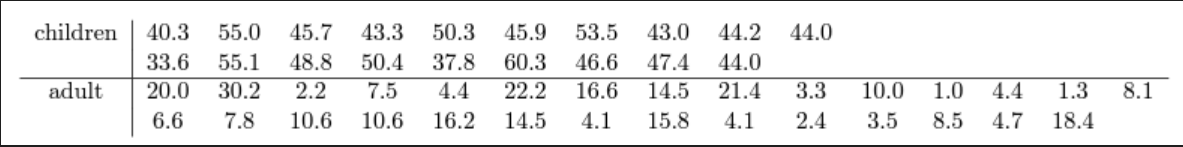

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [22]:
# your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#reading data into dataframes
c_s=[40.3,55.0,45.7,43.3,50.3,45.9,53.5,43.0,44.2,44.0,33.6,55.1,48.8,50.4,37.8,60.3,46.6,47.4,44.0]
children=pd.DataFrame(c_s)
children.columns=['Child_Sugar']
a_s=[20.0,30.2,2.2,7.5,4.4,22.2,16.6,14.5,21.4,3.3,10.0,1.0,4.4,1.3,8.1,6.6,7.8,10.6,10.6,16.2,14.5,4.1,15.8,4.1,2.4,3.5,8.5,4.7,18.4]
adult=pd.DataFrame(a_s)
adult.columns=['Adult_Sugar']


#data description
print(children.describe(),'\n\n',adult.describe())

       Child_Sugar
count    19.000000
mean     46.800000
std       6.418376
min      33.600000
25%      43.650000
50%      45.900000
75%      50.350000
max      60.300000 

        Adult_Sugar
count    29.000000
mean     10.168966
std       7.475680
min       1.000000
25%       4.100000
50%       8.100000
75%      15.800000
max      30.200000


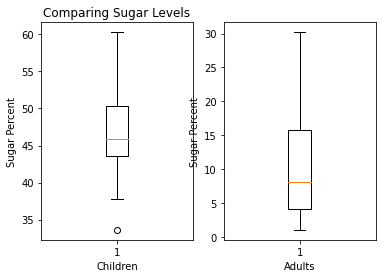

In [23]:
#plotting the boxplots

plt.subplot(1, 2, 1)
plt.boxplot(x=children['Child_Sugar'])
plt.title('Comparing Sugar Levels')
plt.xlabel('Children')
plt.ylabel('Sugar Percent')


plt.subplot(1, 2, 2)
plt.boxplot(x=adult['Adult_Sugar'])
plt.xlabel('Adults')
plt.ylabel('Sugar Percent')

plt.show()

In [24]:
#generating 95% confidence interval for the difference in the mean sugar content
sd1=round(children['Child_Sugar'].std(),2)
sd2=round(adult['Adult_Sugar'].std(),2)
x1=round(np.mean(c_s),2)
x2=round(np.mean(a_s),2)
n1=len(c_s)
n2=len(a_s)
r1=(x1-x2)+(1.96*(np.sqrt(((sd1**2)/n1)+((sd2**2)/n2))))
r2=(x1-x2)-(1.96*(np.sqrt(((sd1**2)/n1)+((sd2**2)/n2))))
print("95% Confidence Interval for the difference in mean sugar content: (",r2,',',r1,')',sep='')

95% Confidence Interval for the difference in mean sugar content: (32.661976079780544,40.59802392021945)


In [ ]:
# You answer here
"""
 we can say with 95 percent confidence that the sugar level in children products is higher,
 on average, than the sugra level in adult products, ranging somewhere between 
 32.6619 and 40.5980 percent, based on our sample.
"""



### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [15]:
# your code here
import sklearn
from sklearn.metrics import cohen_kappa_score
data=pd.read_csv('lab08-dataset.csv')
data.head()

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [26]:
#getting inter-rater relaibility metric using cohen kappa coefficient
a_12=cohen_kappa_score(data['Annotation1'], data['Annotation2'])
a_23=cohen_kappa_score(data['Annotation2'], data['Annotation3'])
a_31=cohen_kappa_score(data['Annotation3'], data['Annotation1'])
print(a_12,a_23,a_31)

0.42830184648552283 0.5201725501326195 0.6699506558982792


From the above results, we can observe that the possibility of agreement is significant and is approximately more than 0.5, which is considered the usual standard for the inter-rater reliability.